In [1]:
import pandas as pd
import numpy as np

In [2]:
#load the raw dataset
df=pd.read_csv(r"C:\Users\kusha\Downloads\messy_sales_dataset.csv")
print(df)

     Sale_ID Product_Name     Category Quantity Unit_Price      Sale_Date  \
0          1       Tablet  Electronics     five        500  not available   
1          2        Phone      Gadgets        4       300$     2020|05|22   
2          3        Watch  Electronics       -3    unknown            NaN   
3          4       Tablet  electronics        5        300     2021-01-10   
4          5      Charger          NaN     five        400     2021-01-10   
..       ...          ...          ...      ...        ...            ...   
155       44       Camera          NaN     five       300$            NaN   
156      100        Phone          NaN        1       9999            NaN   
157      116       Camera      GADGETS     five       9999     2020|05|22   
158      120       Tablet      Gadgets      NaN       9999     10/12/2021   
159      108        Watch  electronics     1000        200            NaN   

    Customer_Rating   Remarks  
0               NaN      Good  
1          

In [3]:
#checking the duplicates rows in a dataset
print(f"Number of duplicate rows:{df.duplicated().sum()}\n")
print("The duplicates rows aree:")
print(df[df.duplicated()])

Number of duplicate rows:10

The duplicates rows aree:
     Sale_ID Product_Name     Category Quantity Unit_Price   Sale_Date  \
150       62      Charger  Accessories     1000        400  10/12/2021   
151       58        Watch      Gadgets        2        500  2021-01-10   
152       11      Charger      GADGETS       -3        400         NaN   
153       72       Laptop      Gadgets     five        200  2020|05|22   
154       97       Camera  Accessories       -3        200  2020|05|22   
155       44       Camera          NaN     five       300$         NaN   
156      100        Phone          NaN        1       9999         NaN   
157      116       Camera      GADGETS     five       9999  2020|05|22   
158      120       Tablet      Gadgets      NaN       9999  10/12/2021   
159      108        Watch  electronics     1000        200         NaN   

    Customer_Rating   Remarks  
150             bad      Good  
151             bad   Damaged  
152              10      Good  
15

In [4]:
#Remove the duplicated rows from the dataset and check again
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows:{df.duplicated().sum()}\n")

Number of duplicate rows:0



In [5]:
# Handle the column name 
df.columns=(
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ","_")
)
print(df.columns)

Index(['sale_id', 'product_name', 'category', 'quantity', 'unit_price',
       'sale_date', 'customer_rating', 'remarks'],
      dtype='object')


In [6]:
# handling column---> product_name
print(f"Number of null values:{df['product_name'].isnull().sum()}\n")
print("Getting basic information about 'product_name' column\n")
print(df['product_name'].info(),'\n')
print("Diffrent type of products are:")
print(df['product_name'].value_counts(),'\n')

Number of null values:0

Getting basic information about 'product_name' column

<class 'pandas.core.series.Series'>
Index: 150 entries, 0 to 149
Series name: product_name
Non-Null Count  Dtype 
--------------  ----- 
150 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB
None 

Diffrent type of products are:
product_name
Watch                    21
Camera                   20
Headphones               20
Phone                    17
Tablet                   17
Charger                  16
Laptop                   15
TV                       14
Charger|Charger           2
Laptop|Laptop             2
Phone|Phone               2
Tablet|Tablet             1
Watch|Watch               1
TV|TV                     1
Headphones|Headphones     1
Name: count, dtype: int64 



In [7]:
#handling the messy cell values
df['product_name']=df['product_name'].str.lower().str.split('|',expand=True)[0]
print("After handling the messy cell values\n")
print(df['product_name'].value_counts())

After handling the messy cell values

product_name
watch         22
headphones    21
camera        20
phone         19
charger       18
tablet        18
laptop        17
tv            15
Name: count, dtype: int64


In [8]:
# Handling column--> category column
print("Getting basic information about 'category' column\n")
print(df['category'].info(),'\n')
print(f"Find number of null cells:{df['category'].isnull().sum()}\n")
print("Diffrent type of category:")
print(df['category'].value_counts(),'\n')

Getting basic information about 'category' column

<class 'pandas.core.series.Series'>
Index: 150 entries, 0 to 149
Series name: category
Non-Null Count  Dtype 
--------------  ----- 
118 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB
None 

Find number of null cells:32

Diffrent type of category:
category
Gadgets        29
GADGETS        27
Accessories    26
electronics    19
Electronics    17
Name: count, dtype: int64 



In [9]:
# Handling multiple text of same cell value
# Handling messy category
df['category']=df['category'].str.lower()
print("After handling cell values")
print(df['category'].value_counts())

After handling cell values
category
gadgets        56
electronics    36
accessories    26
Name: count, dtype: int64


In [10]:
# Handling missing cell values after infer from product_name
#creating a dictionary that have product_name with their category
product_category_map = {
    'phone': 'electronics',
    'laptop': 'electronics',
    'tablet': 'electronics',
    'tv': 'electronics',
    
    'smartwatch': 'accessories',
    'watch':'accessories',
    
    'camera':'accessories',
    'charger':'gadgets',
    'headphones':'gadgets'
}

#making a function that infer category from thier products
def detect_category(product):
    if pd.isna(product):
        return None
    for keyword, category in product_category_map.items():
        if keyword in product:
            return category
    return None

In [11]:
# Detect and fill the missing category by calling the detect_category function
mask=df['category'].isna()
df.loc[mask,'category']=(
    df.loc[mask,'product_name'].apply(detect_category)
)
# Check the null cells after applying function
print(f"Category column have the null cell after handling null values:{df['category'].isnull().sum()}\n")

Category column have the null cell after handling null values:0



In [12]:
# this column has many inconsistency
# First replace the text with the digit and the negative values to the null
df['quantity']=df['quantity'].replace('five',5)
df['quantity']=pd.to_numeric(df['quantity'],errors='coerce')
# Handle the negative values
df['quantity']=df['quantity'].apply(lambda x:x if x>=0 else np.nan)
df['quantity'].value_counts()

quantity
5.0       38
1000.0    20
3.0       17
4.0       16
1.0       16
2.0       12
Name: count, dtype: int64

In [13]:
# Before handle the null values check the outlier in this column 
# Based on the existence of outlier make dicision to fill mean, median
# make a function that take a column as input and return outlier values in cells if exists
def check_outlier(df,column):
    q1=df[column].quantile(0.25)
    q2=df[column].quantile(0.75)
    iqr=q2-q1
    lower=q1-1.5*iqr
    upper=q2+1.5*iqr
    outlier=df[
             (df[column]<lower)|
             (df[column]>upper)
     ]
    if outlier.empty:
        return "There is no any outlier exists !"
    else:
        return outlier

In [14]:
# Check the outlier according to the diffrent category
quantity_outlier=df.groupby('category',group_keys=False)[['quantity']].apply(check_outlier,column='quantity')
print(quantity_outlier,"\n")

     quantity
61     1000.0
87     1000.0
138    1000.0
22     1000.0
67     1000.0
70     1000.0
107    1000.0
130    1000.0
131    1000.0
133    1000.0
145    1000.0
27     1000.0
33     1000.0
37     1000.0
39     1000.0
68     1000.0
72     1000.0
85     1000.0
121    1000.0
126    1000.0 



In [15]:
# So this quantity column has a outlier 
# Fill the median value at null cells
# Acording to the category 
df['quantity']=(
    df.groupby('category')['quantity'].transform(lambda x:x.fillna(x.median()))
)
# Check the null after handling
print(f"The number of null values in this column:{df['quantity'].isnull().sum()}\n")

The number of null values in this column:0



In [16]:
# After filling the median value to the null cells handle the outlier cells
# Make a functiion that fill the outlier acording to the category
def fill_outlier(df,category,column):
    df[column]=(
    df.groupby(category)[column]
      .transform(lambda x:x.clip(
            x.quantile(0.25) - 1.5*(x.quantile(0.75)-x.quantile(0.25)),
          x.quantile(0.75) + 1.5*(x.quantile(0.75)-x.quantile(0.25))
                 ))
)

In [17]:
# Handle the outlier value to calling the fill_outlier function
fill_outlier(df,'category','quantity')

# After handling the outlier recheck the outlier in the column
quantity_outlier=df.groupby('category',group_keys=False)[['quantity']].apply(check_outlier,column='quantity')
print(quantity_outlier,"\n")

category
accessories    There is no any outlier exists !
electronics    There is no any outlier exists !
gadgets        There is no any outlier exists !
dtype: object 



In [18]:
# Convert the datatype in to the int for furthur analysis
df['quantity']=df['quantity'].astype(int)

In [19]:
# Now check Overall information of the each column
print(df.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sale_id          150 non-null    int64 
 1   product_name     150 non-null    object
 2   category         150 non-null    object
 3   quantity         150 non-null    int64 
 4   unit_price       141 non-null    object
 5   sale_date        127 non-null    object
 6   customer_rating  140 non-null    object
 7   remarks          133 non-null    object
dtypes: int64(2), object(6)
memory usage: 10.5+ KB
None 



In [20]:
# Now handle the unit_price column
# Getting the basic information about 'Unit_Price column'
print("Getting the basic information about 'Unit_Price' column\n")
print(df['unit_price'].info(),"\n")
print(f"The number of cells that have null values:{df['unit_price'].isnull().sum()}\n")
print("Diffrent type of values keeping by the 'unit_price' column\n")
print(df['unit_price'].value_counts(),"\n")

Getting the basic information about 'Unit_Price' column

<class 'pandas.core.series.Series'>
Index: 150 entries, 0 to 149
Series name: unit_price
Non-Null Count  Dtype 
--------------  ----- 
141 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB
None 

The number of cells that have null values:9

Diffrent type of values keeping by the 'unit_price' column

unit_price
9999       27
200        26
500        22
400        22
300$       16
300        15
unknown    13
Name: count, dtype: int64 



In [21]:
# We have to remove the any special symbol from the cells
df['unit_price']=df['unit_price'].replace("$",'')
# We have convert unknown cells with 'nan' so we can handle with the nulll cells
df['unit_price']=df['unit_price'].replace('unknown',np.nan)
# Now we have to convert the datatype from 'string' to 'float' for handling the null cells 
df['unit_price']=pd.to_numeric(df['unit_price'],errors='coerce')

In [22]:
# Check the outlier in the 'unit_price' column according to the diffrent category 'product_name'
# Run the 'check_outlier' function by giving 'unit_price' for multiple product_name
unit_price_outlier=df.groupby('product_name',group_keys=False)[['unit_price']].apply(check_outlier,column='unit_price')
unit_price_outlier

product_name
camera                       There is no any outlier exists !
charger                             unit_price
72      9999.0
headphones         unit_price
34       9999.0
117      9999.0
laptop                       There is no any outlier exists !
phone                        There is no any outlier exists !
tablet             unit_price
119      9999.0
130      9999.0
tv                           There is no any outlier exists !
watch                        There is no any outlier exists !
dtype: object

In [23]:
# 'Unit_price' column has a outlier so we fill the median in to the null cells
# Handling the null int to the 'unit_price' acording to the product_name
df['unit_price']=df.groupby('product_name')['unit_price'].transform(lambda x:x.fillna(x.median()))
# check the number of null cells after handling
print(f"The number of cells that have null values:{df['unit_price'].isnull().sum()}\n")

The number of cells that have null values:0



In [24]:
# So we have fix the outlier for better analysis
# Run the 'fill_outlier' function based on the 'product_name' category
fill_outlier(df,'product_name','unit_price')

# After handling the outlier recheck the outlier in the colum
unit_price_outliers=df.groupby('product_name',group_keys=False)[['unit_price']].apply(check_outlier,column='unit_price')
print(unit_price_outliers)

product_name
camera        There is no any outlier exists !
charger       There is no any outlier exists !
headphones    There is no any outlier exists !
laptop        There is no any outlier exists !
phone         There is no any outlier exists !
tablet        There is no any outlier exists !
tv            There is no any outlier exists !
watch         There is no any outlier exists !
dtype: object


In [25]:
# Convert the datatype in to the int for furthur analysis
df['unit_price']=df['unit_price'].astype(int)

In [26]:
# Now check Overall information of the each column
print(df.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sale_id          150 non-null    int64 
 1   product_name     150 non-null    object
 2   category         150 non-null    object
 3   quantity         150 non-null    int64 
 4   unit_price       150 non-null    int64 
 5   sale_date        127 non-null    object
 6   customer_rating  140 non-null    object
 7   remarks          133 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.5+ KB
None 



In [27]:
# Now handle the 'sale_date' column
# Check the basic info about 'sale_date'
print("Check the basic info about 'sale_date' \n")
print(df['sale_date'].info(),"\n")
print("Check the number of cells that have null values \n")
print(f"The number of cells that have null values:{df['sale_date'].isnull().sum()} \n")
print("Check diffrent type of date formates \n")
print(df['sale_date'].value_counts(),"\n")

Check the basic info about 'sale_date' 

<class 'pandas.core.series.Series'>
Index: 150 entries, 0 to 149
Series name: sale_date
Non-Null Count  Dtype 
--------------  ----- 
127 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB
None 

Check the number of cells that have null values 

The number of cells that have null values:23 

Check diffrent type of date formates 

sale_date
not available    35
10/12/2021       32
2020|05|22       31
2021-01-10       29
Name: count, dtype: int64 



In [28]:
# This column has many inconsistent dates
# Handle the all inconsistencys
df['sale_date']=df['sale_date'].replace('not available',np.nan)
df['sale_date']=df['sale_date'].astype(str).str.replace('|','-')
print(df['sale_date'].value_counts(),"\n")

sale_date
nan           58
10/12/2021    32
2020-05-22    31
2021-01-10    29
Name: count, dtype: int64 



In [29]:
df['sale_date']=pd.to_datetime(df['sale_date'],errors='coerce',dayfirst=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_8652\3699987425.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['sale_date']=pd.to_datetime(df['sale_date'],errors='coerce',dayfirst=True)


In [30]:
# Now handle the null values
# The number of null values are large so we can't drop the rows
# prefer the 'ffill' and 'bfill' to handle the null values
df['sale_date']=df['sale_date'].ffill()
df['sale_date']=df['sale_date'].bfill()
print(f"The number of cells that have null values:{df['sale_date'].isnull().sum()} \n")

The number of cells that have null values:0 



In [31]:
# Now check the overall structure of the cleaned dataset
print(f"The basic information about dataset: \n")
df.info()

The basic information about dataset: 

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sale_id          150 non-null    int64         
 1   product_name     150 non-null    object        
 2   category         150 non-null    object        
 3   quantity         150 non-null    int64         
 4   unit_price       150 non-null    int64         
 5   sale_date        150 non-null    datetime64[ns]
 6   customer_rating  140 non-null    object        
 7   remarks          133 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 10.5+ KB


In [32]:
# Now handle the 'customer_rating' column
# Check the basic info about 'customer_rating'
print("Check the basic info about 'customer_rating' \n")
print(df['customer_rating'].info(),"\n")
print("Check the number of cells that have null values \n")
print(f"The number of cells that have null values:{df['customer_rating'].isnull().sum()} \n")
print("Check diffrent type of ratings \n")
print(df['customer_rating'].value_counts(),"\n")

Check the basic info about 'customer_rating' 

<class 'pandas.core.series.Series'>
Index: 150 entries, 0 to 149
Series name: customer_rating
Non-Null Count  Dtype 
--------------  ----- 
140 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB
None 

Check the number of cells that have null values 

The number of cells that have null values:10 

Check diffrent type of ratings 

customer_rating
3      22
5      19
4      19
1      19
-1     19
bad    17
2      13
10     12
Name: count, dtype: int64 



In [33]:
# Handle the 'customer_rating column' inconsistency
df['customer_rating']=pd.to_numeric(df['customer_rating'],errors='coerce')
df['customer_rating']=df['customer_rating'].replace('bad',1)
df['customer_rating']=df['customer_rating'].apply(lambda x:x if 0<x<=5 else np.nan)
print(df['customer_rating'].value_counts(),"\n")
print(f"The number of cells that have null values:{df['customer_rating'].isnull().sum()} \n")

customer_rating
3.0    22
5.0    19
4.0    19
1.0    19
2.0    13
Name: count, dtype: int64 

The number of cells that have null values:58 



In [34]:
# Handle the null values with the 'mode()'
df['customer_rating']=df.groupby('product_name')['customer_rating'].transform(lambda x:x.fillna(x.mode()[0]))
print(f"The number of cells that have null values:{df['customer_rating'].isnull().sum()} \n")

The number of cells that have null values:0 



In [35]:
df['customer_rating']=df['customer_rating'].astype(int)

In [36]:
df['customer_rating'].value_counts()

customer_rating
1    40
4    36
3    32
5    29
2    13
Name: count, dtype: int64

In [37]:
# Now handle the 'remark' column
# getting the basic information about 'remark'
print("Check the basic info about 'remark' \n")
print(df['remarks'].info(),"\n")
print("Check the number of cells that have null values \n")
print(f"The number of cells that have null values:{df['remarks'].isnull().sum()} \n")
print("Check diffrent type of ratings \n")
print(df['remarks'].value_counts(),"\n")

Check the basic info about 'remark' 

<class 'pandas.core.series.Series'>
Index: 150 entries, 0 to 149
Series name: remarks
Non-Null Count  Dtype 
--------------  ----- 
133 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB
None 

Check the number of cells that have null values 

The number of cells that have null values:17 

Check diffrent type of ratings 

remarks
Damaged     26
Good        25
123         23
OK          22
True        19
Returned    18
Name: count, dtype: int64 



In [38]:
# This column has many messy cells data
# Handle all the inconsistent data
df['remarks'] = df['remarks'].apply(lambda x: np.nan if str(x).isdigit() else x)
df['remarks']=df['remarks'].replace('True','OK')
df['remarks'] = df['remarks'].fillna(df['remarks'].mode()[0])
print(f" the number of cells that have null values:{df["remarks"].isnull().sum()}\n")
print(f"The diffrent type of remark have:\n{df["remarks"].value_counts()}\n")

 the number of cells that have null values:0

The diffrent type of remark have:
remarks
OK          81
Damaged     26
Good        25
Returned    18
Name: count, dtype: int64



In [39]:
# Now check the overall structure of the cleaned dataset
print(f"The basic information about dataset: \n")
df.info()
print(f"\nThe baisc descriptive analysis of numerical column:\n{df.describe()}\n")
print(f"\nThe shape of the dataset:\n{df.shape}\n")
print(f"The final cleaned dataset:\n")
df.head(50)

The basic information about dataset: 

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sale_id          150 non-null    int64         
 1   product_name     150 non-null    object        
 2   category         150 non-null    object        
 3   quantity         150 non-null    int64         
 4   unit_price       150 non-null    int64         
 5   sale_date        150 non-null    datetime64[ns]
 6   customer_rating  150 non-null    int64         
 7   remarks          150 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 10.5+ KB

The baisc descriptive analysis of numerical column:
          sale_id    quantity   unit_price            sale_date  \
count  150.000000  150.000000   150.000000                  150   
mean    75.500000    4.153333   997.926667  2020-09-09 06:52:48   
min     

,sale_id,product_name,category,quantity,unit_price,sale_date,customer_rating,remarks
0,1,tablet,electronics,5,400,2020-05-22,1,Good
1,2,phone,gadgets,4,450,2020-05-22,5,OK
2,3,watch,electronics,5,500,2020-05-22,4,OK
3,4,tablet,electronics,5,400,2021-01-10,2,OK
4,5,charger,gadgets,5,400,2021-01-10,4,Good
5,6,camera,accessories,3,200,2020-05-22,3,Damaged
6,7,laptop,gadgets,5,500,2020-05-22,1,OK
7,8,phone,accessories,3,200,2020-05-22,5,OK
8,9,watch,accessories,5,500,2020-05-22,5,Returned
9,10,tablet,gadgets,4,400,2020-05-22,4,OK


In [40]:
# load the dataset in to the new file 'cleaned_dataset'
df.to_csv("cleaned_data.csv", index=False)

In [41]:
import matplotlib.pyplot as plt

In [42]:
# Add a column that calculate a 'total_sales' for each row.
df['total_sales']=df['quantity']*df['unit_price']

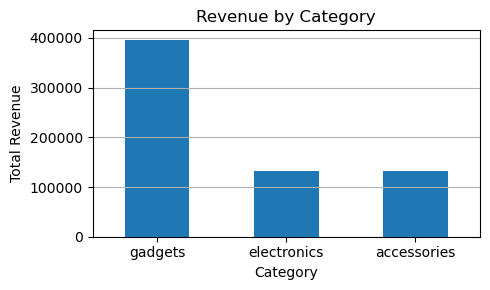

In [43]:
# Calculate category wise revenue to understand top category in term of genrating revenue.
cat_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(5,3))
cat_sales.plot(kind='bar')

plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


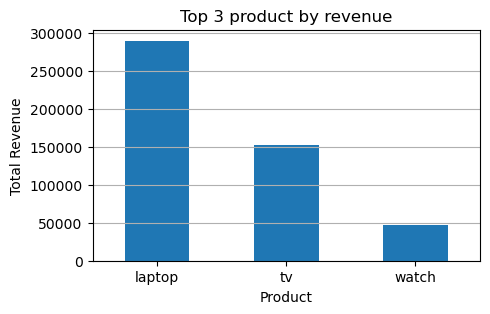

In [44]:
# Find top 3 product that genrate most revenue.  
product_sales=df.groupby('product_name')['total_sales'].sum().sort_values(ascending=False).head(3)

plt.figure(figsize=(5,3))
product_sales.plot(kind='bar')
plt.title("Top 3 product by revenue")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


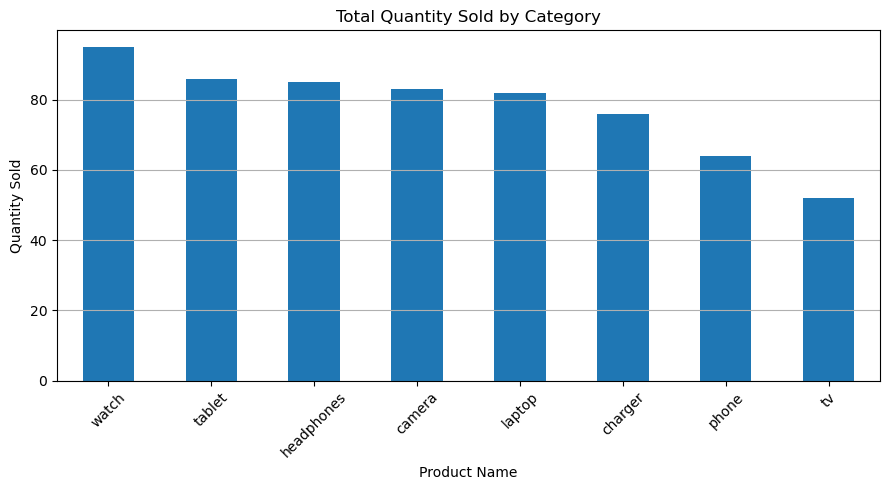

In [45]:
# Find number of sales of each product
qty_cat = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(9,5))
qty_cat.plot(kind='bar')

plt.title("Total Quantity Sold by Category")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


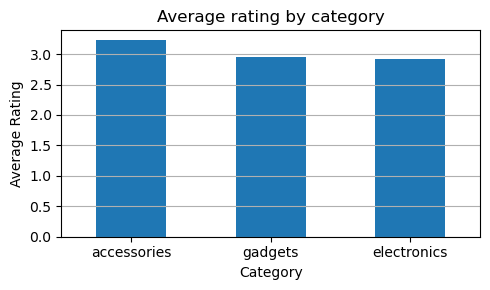

In [46]:
# Find average rating given by customers on each category
ave_rating=df.groupby('category')['customer_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(5,3))
ave_rating.plot(kind='bar')

plt.title("Average rating by category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

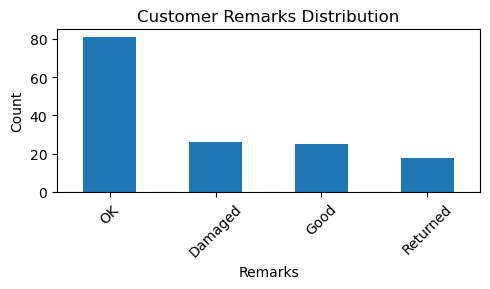

In [47]:
# Find the remark distribution
plt.figure(figsize=(5,3))
df['remarks'].value_counts().plot(kind='bar')

plt.title("Customer Remarks Distribution")
plt.xlabel("Remarks")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
